# 3.2 Generación de matriz de frecuencia de terminos 

## Se importan las librerias necesarias 

In [2]:
import pandas as pd 
import numpy as np
import nltk 
from nltk.corpus import stopwords
import re
import matplotlib as plt
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import decomposition


 A modo ilustrativo vamos a empezar solo generando la tokenización y la lematización de un solo documento. Una vez terminamos la ilustracción continuamos con la solución del ejercicio planteado

### Vamos a generar la Matriz de Frecuencia y el grafico de Frecuencia de los terminos más comunes del tema de "Comunicación"

Se lee el archivo txt llamado "Comunicación"

In [3]:
path_in = "/home/jsavilaarias/Algebra_Taller3_Sebastian_David/"
filenametxt = "comunicacion.txt"

Se utiliza esta función para extraer el texto que se requiere del archivo por medio de expresiones regulares

In [4]:
def extract_texts(filename):
    with open(filename, 'r') as f:
        input_text = f.read()
    matches = re.finditer(r"-={Concordancia}=-\n(.*?)\n-={Referencia bibliográfica}=-", input_text, re.DOTALL)
    extracted_texts = []
    for match in matches:
        extracted_text = match.group(1).strip()
        extracted_texts.append(extracted_text)
    return extracted_texts

In [5]:
extracted_texts = extract_texts(path_in + filenametxt)
extracted_texts

['El método tenía aún más inconvenientes, algunos difíciles de apreciar, aun cuando se sospechen, como el aborto en los primeros días del embrión. Otros eran de consecuencias más graves para la mujer, como los embarazos ectópicos o placenta previa. La experiencia clínica fue apareciendo en varias comunicaciones, pero lo que llama un poco la atención es que los trabajos acerca de estos hechos no han llegado a interesar hasta que se han conocido métodos anticonceptivos de mayor seguridad y eficacia. Es corriente que los trabajos científicos tarden un cierto tiempo en llegar al conocimiento de todos aquellos lectores a quienes puedan interesar. Sin embargo,',
 'En publicaciones de hace muy pocos años, aparecieron las primeras comunicaciones sobre fecundación de óvulos humanos y cultivo «in vitro», ante el estupor general. Ahora ya a nadie le choca leer que los datos de un trabajo se han obtenido en fetos vivos procedentes de aborto legal. En lo que publican, sin embargo, siempre suavizan 

Se descargan los Stop Word en español

In [ ]:
stop_words_nltk = set(stopwords.words('spanish'))
print(len(stop_words_nltk))
print(stop_words_nltk)

Se genera la tokenización y se genera la frecuencia de palabras 

In [7]:
# TOKENIZAR con nltk,
# ELIMINAR tokens de long = 1
# ELIMINAR caracteres que no sean alfanumericos
# REMOVER stop words

text = ' '.join(extracted_texts)
tokens = nltk.word_tokenize(text)
tokens = [w.lower() for w in tokens if len(w)>1]
tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
tokens = [w for w in tokens if w not in stop_words_nltk]

# Generar la matriz de frecuencia
freq_dist = nltk.FreqDist(tokens)

# Imprimir las 10 palabras más frecuentes
print(freq_dist.most_common(10))

[('comunicacin', 1089), ('', 631), ('ms', 231), ('medios', 223), ('comunicaciones', 170), ('ser', 160), ('puede', 130), ('tambin', 122), ('si', 117), ('sistema', 114)]


In [8]:
# Generemos la matriz de frecuencia
freq_dist = FreqDist(tokens)
freq_dist

FreqDist({'comunicacin': 1089, '': 631, 'ms': 231, 'medios': 223, 'comunicaciones': 170, 'ser': 160, 'puede': 130, 'tambin': 122, 'si': 117, 'sistema': 114, ...})

In [9]:
# Creamos la matriz de frecuencia 
for word, frequency in freq_dist.most_common(20):
    print(f'{word}: {frequency}')

comunicacin: 1089
: 631
ms: 231
medios: 223
comunicaciones: 170
ser: 160
puede: 130
tambin: 122
si: 117
sistema: 114
informacin: 113
social: 97
medio: 94
slo: 93
mensaje: 87
lenguaje: 82
parte: 81
mundo: 80
masas: 78
forma: 77


Se genera la gracia de los 20 terminos más frecuentes despues de la tokenización

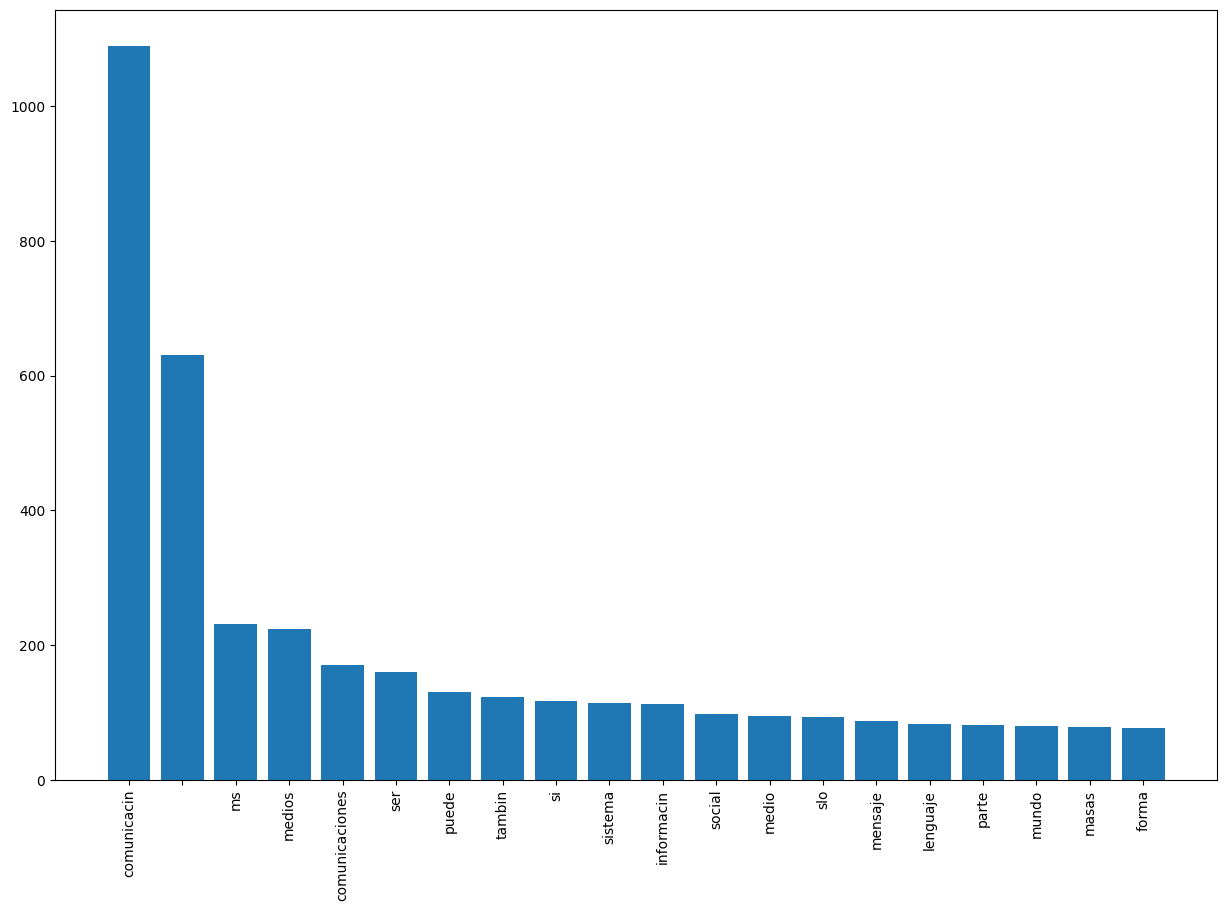

In [10]:
# graficar los 20 términos más frecuentes:
topwords = freq_dist.most_common(20)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

## Vamos a Lematizar 

Significa que vamos a llevar las palabras a su raices comunes

In [11]:
wordnet_lemmatizer = WordNetLemmatizer()

# probar cada una de las siguientes opciones:
tokens = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens ]
#tokens = [wordnet_lemmatizer.lemmatize(w) for w in tokens ]

In [12]:
# Generemos la matriz de frecuencia
freq_dist = FreqDist(tokens)
freq_dist

FreqDist({'comunicacin': 1089, '': 631, 'ms': 231, 'medios': 223, 'comunicaciones': 170, 'ser': 160, 'puede': 130, 'tambin': 122, 'si': 117, 'sistema': 114, ...})

In [13]:
# Creamos la matriz de frecuencia 
for word, frequency in freq_dist.most_common(20):
    print(f'{word}: {frequency}')

comunicacin: 1089
: 631
ms: 231
medios: 223
comunicaciones: 170
ser: 160
puede: 130
tambin: 122
si: 117
sistema: 114
informacin: 113
social: 97
medio: 94
slo: 93
mensaje: 87
lenguaje: 82
parte: 81
mundo: 80
general: 78
masas: 78


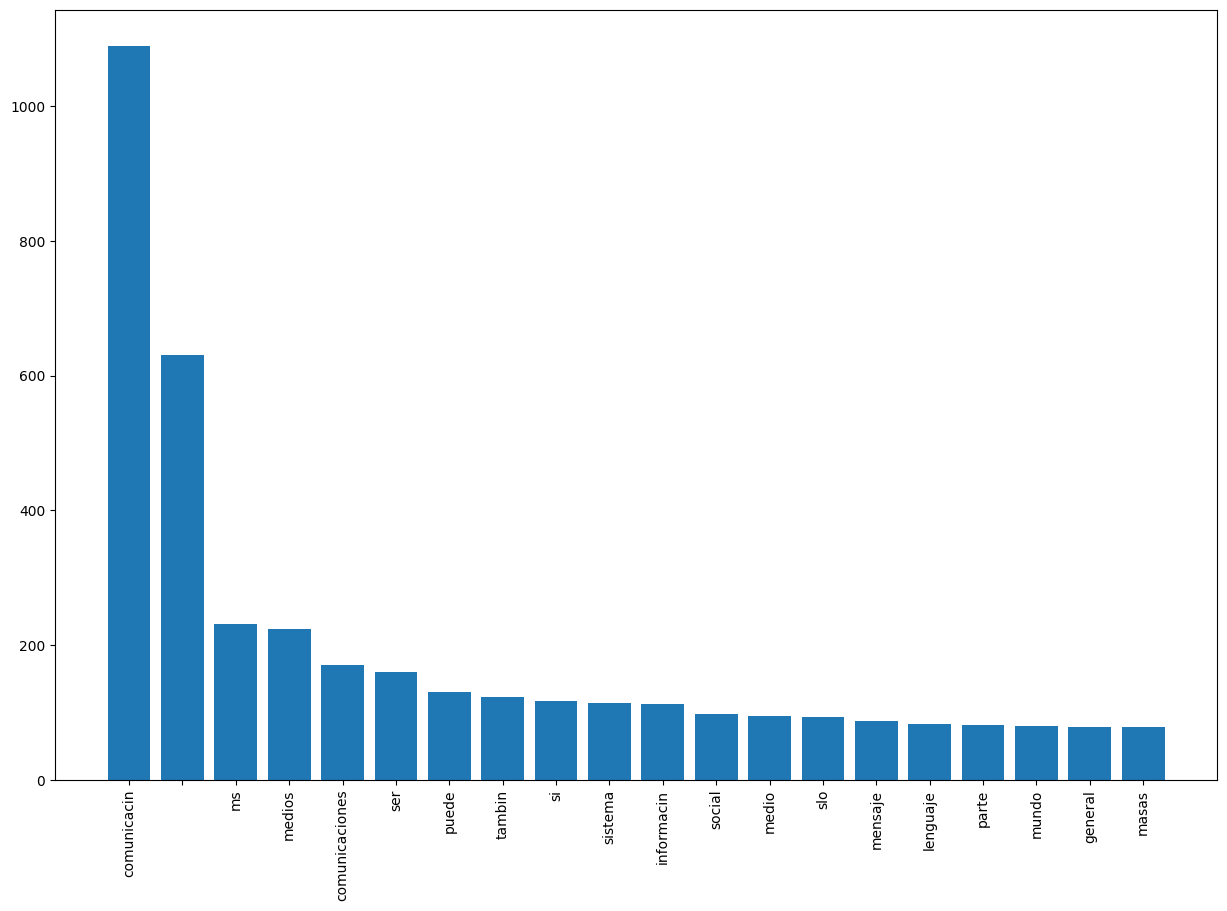

In [14]:
# graficar los 20 términos más frecuentes:
topwords = freq_dist.most_common(20)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

## Ahora vamos a generar la Matriz de Frecuencia de los tres terminos

In [15]:
# Descargar los recursos necesarios de NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jsavilaarias/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/jsavilaarias/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/jsavilaarias/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
# Obtener la lista de stop words en español
stop_words = set(stopwords.words('spanish'))

# Crear un objeto lematizador
lemmatizer = WordNetLemmatizer()

In [17]:
path_in_c = "/home/jsavilaarias/Algebra_Taller3_Sebastian_David/"
filenametxt_c = "comunicacion.txt"

path_in_d = "/home/jsavilaarias/Algebra_Taller3_Sebastian_David/"
filenametxt_d = "desempleo.txt"

path_in_m = "/home/jsavilaarias/Algebra_Taller3_Sebastian_David/"
filenametxt_m = "medicina.txt"

In [18]:
def extract_texts(filename):
    with open(filename, 'r') as f:
        input_text = f.read()
    matches = re.finditer(r"-={Concordancia}=-\n(.*?)\n-={Referencia bibliográfica}=-", input_text, re.DOTALL)
    extracted_texts = []
    for match in matches:
        extracted_text = match.group(1).strip()
        extracted_texts.append(extracted_text)
    return extracted_texts

In [19]:
extracted_texts_c = extract_texts(path_in_c + filenametxt_c)
extracted_texts_d = extract_texts(path_in_d + filenametxt_d)
extracted_texts_m = extract_texts(path_in_m + filenametxt_m)

In [20]:
extracted_texts_m

['En este capítulo, como en tantos otros de la Medicina, el progreso de la investigación es motivo de tal número de publicaciones, que apenas las puede abarcar el especialista. Sin embargo, es ineludible hacer alguna referencia a los estudios más recientes, aunque sea en pocas líneas, porque, como ya hemos dicho, si no se tiene noticia de todo ello se puede incurrir en',
 'Tuvo gran difusión desde el principio, y pronto se comprobó que en un cierto porcentaje de casos fallaba y se producía el embarazo. Así se fue recogiendo casuística significativa para el pronóstico de estos embarazos inesperados, encontrándose una relación entre embarazos no queridos y niños anormales. Los que recuerdan clases en nuestras Facultades de Medicina desde hace muchos años, no han olvidado la insistencia con que algunos catedráticos de Pediatría o de Obstetricia llamaban la atención sobre este hecho. Los casos de mongolismo en embarazos no queridos, que se atribuían a la fecundación producida en momento ta

In [21]:
texto_completo = []
texto_completo = [*texto_completo, *extract_texts(path_in_c + filenametxt_c)]
texto_completo = [*texto_completo, *extract_texts(path_in_d + filenametxt_d)]
texto_completo = [*texto_completo, *extract_texts(path_in_m + filenametxt_m)]

In [22]:
print(texto_completo[2])

países, la mayoría de los abortos provocados se hacen clandestinamente. En los últimos años, el aumento ha sido tan llamativo —incluyendo cada vez más abortos tardíos, con feto vivo— que en diversos países superan, incluso, las tasas de natalidad. Sin embargo, no es raro que cuando así lo reflejan publicaciones y comunicaciones clínicas, los estudios estadísticos no den resultados similares.


In [23]:
Dataframe = pd.DataFrame(texto_completo, columns=['texto'])
Dataframe

,texto
0,"El método tenía aún más inconvenientes, alguno..."
1,"En publicaciones de hace muy pocos años, apare..."
2,"países, la mayoría de los abortos provocados s..."
3,"interrupción del embarazo. Por otra parte, est..."
4,les era lícito aprender a los hijos de los cac...
...,...
2998,. Había 15 veces menos estudiantes de este tip...
2999,La situación nacional de la enseñanza de cienc...
3000,nacional de la enseñanza de ciencias de la sal...
3001,A este respecto pueden mencionarse dos indicad...


In [24]:
# Definir una función para lematizar y eliminar las stop words de un texto
def process_text(text):
    # Tokenizar el texto en palabras
    words = word_tokenize(text)

    # Lematizar las palabras
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Filtrar las palabras que son stop words
    filtered_words = [word for word in lemmatized_words if word.lower() not in stop_words]

    # Unir las palabras filtradas en un nuevo texto
    new_text = ' '.join(filtered_words)

    return new_text


In [25]:
# Aplicar la función a la columna 'texto' del DataFrame
Dataframe['processed_text'] = Dataframe['texto'].apply(process_text)

In [26]:
Dataframe

,texto,processed_text
0,"El método tenía aún más inconvenientes, alguno...","método aún inconvenientes , difíciles apreciar..."
1,"En publicaciones de hace muy pocos años, apare...","publicaciones hace pocos años , aparecieron pr..."
2,"países, la mayoría de los abortos provocados s...","países , mayoría abortos provocados hacen clan..."
3,"interrupción del embarazo. Por otra parte, est...","interrupción embarazo . parte , enfermas trata..."
4,les era lícito aprender a los hijos de los cac...,"lícito aprender hijos cacique , cuales fiesta ..."
...,...,...
2998,. Había 15 veces menos estudiantes de este tip...,. 15 veces menos estudiantes tipo medicina núm...
2999,La situación nacional de la enseñanza de cienc...,"situación nacional enseñanza ciencias salud , ..."
3000,nacional de la enseñanza de ciencias de la sal...,"nacional enseñanza ciencias salud , punto vist..."
3001,A este respecto pueden mencionarse dos indicad...,respecto pueden mencionarse do indicadores ilu...


## Se realiza un analisis de tópicos usando una factorización no negativa (NMF) de la matriz construida en el punto anterior

In [27]:
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(Dataframe['processed_text']).todense() # (documents, vocab)
vectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape

(3003, 22684)

In [28]:
print(len(Dataframe['processed_text']), vectors.shape)

3003 (3003, 22684)


In [29]:
vocab = np.array(vectorizer.get_feature_names_out())

In [30]:
vocab.shape

(22684,)

In [31]:
vocab[7000:7020]

array(['desorden', 'desordenación', 'desordenado', 'desordenados',
       'desorganiza', 'desorganización', 'desorganizante', 'desorientar',
       'desoxirribonucleico', 'despachado', 'despacho', 'despacio',
       'despalillado', 'despalinurice', 'despalinurizador',
       'despalinurizarse', 'desparramados', 'despecho', 'despedida',
       'despedidas'], dtype=object)

In [32]:
print(vectors.shape)
print(len(vocab))
print(vectors)

(3003, 22684)
22684
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:
m,n=vectors.shape
d=3  # num topics

In [34]:
clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(np.asarray(vectors))
H1 = clf.components_

: 